In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [10]:
df = df.drop(['User ID','Gender'], axis=1)

In [11]:
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


<Axes: ylabel='Age'>

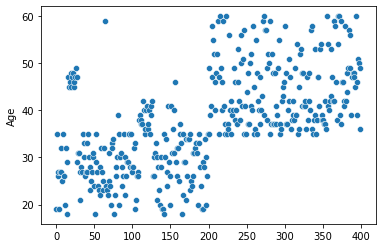

In [13]:
sns.scatterplot(df.iloc[:,0] )

<Axes: ylabel='EstimatedSalary'>

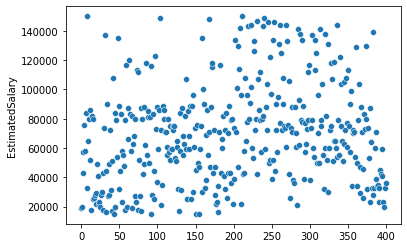

In [14]:
sns.scatterplot(df.iloc[:,1] )


In [31]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [32]:
x.shape,y.shape

((400, 2), (400,))

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [34]:
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 19ms/step - loss: 500.7086 - accuracy: 0.5219 - val_loss: 150.3791 - val_accuracy: 0.3500
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 131.0654 - accuracy: 0.4969 - val_loss: 179.7322 - val_accuracy: 0.3500
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 62.7708 - accuracy: 0.5094 - val_loss: 57.7729 - val_accuracy: 0.3500
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 92.2110 - accuracy: 0.5188 - val_loss: 155.1857 - val_accuracy: 0.3500
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 32.3535 - accuracy: 0.5156 - val_loss: 29.2584 - val_accuracy: 0.6500
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 25.0100 - accuracy: 0.5562 - val_loss: 30.4670 - val_accuracy: 0.3500
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 56.4446 - accuracy: 0.5031 - val_loss: 57.7709 - val_accuracy: 0.6500


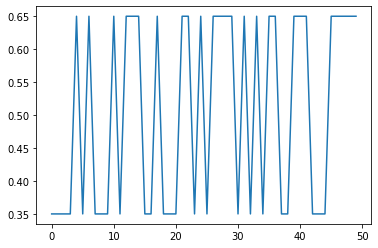

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

### now we will go for scalling 
--> 1. Standard Scaler
--> 2. Normalizer

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [41]:
x_train_scaled[0],x_test_scaled[0]

(array([-1.06675246, -0.38634438]), array([ 0.79753468, -1.40447546]))

In [49]:
 mod = Sequential()
 mod.add(Dense(128, activation='relu', input_dim=2))
 mod.add(Dense(1,activation = "sigmoid"))

In [50]:
mod.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
mod.fit(x_train_scaled,y_train, validation_data=(x_test_scaled,y_test),epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 0.6365 - accuracy: 0.7875 - val_loss: 0.5977 - val_accuracy: 0.8875
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5873 - accuracy: 0.8406 - val_loss: 0.5392 - val_accuracy: 0.8375
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.8219 - val_loss: 0.4907 - val_accuracy: 0.8375
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5079 - accuracy: 0.8344 - val_loss: 0.4480 - val_accuracy: 0.8500
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.4770 - accuracy: 0.8438 - val_loss: 0.4117 - val_accuracy: 0.8750
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4492 - accuracy: 0.8469 - val_loss: 0.3812 - val_accuracy: 0.9125
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.4267 - accuracy: 0.8625 - val_loss: 0.3538 - val_accuracy: 0.9125
Epoch 8/50
10/10 [=

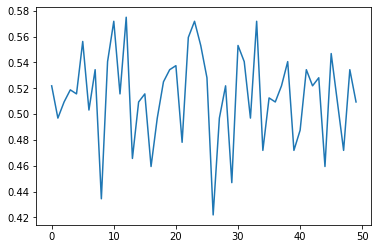

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

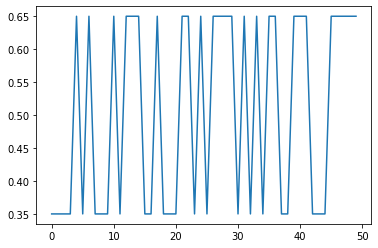

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [61]:
from sklearn.preprocessing import Normalizer
x_train_skld = Normalizer().fit_transform(x_train)

In [62]:
x_train_skld[0]

array([4.73684157e-04, 9.99999888e-01])

In [63]:
x_test_scld = Normalizer().transform(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [64]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(x_train_skld,y_train, validation_data=(x_test_scld,y_test), epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 32ms/step - loss: 0.6964 - accuracy: 0.4594 - val_loss: 0.6783 - val_accuracy: 0.6500
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 0.6721 - accuracy: 0.6406 - val_loss: 0.6622 - val_accuracy: 0.6500
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6606 - accuracy: 0.6406 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6558 - accuracy: 0.6406 - val_loss: 0.6493 - val_accuracy: 0.6500
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6545 - accuracy: 0.6406 - val_loss: 0.6478 - val_accuracy: 0.6500
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6531 - accuracy: 0.6406 - val_loss: 0.6477 - val_accuracy: 0.6500
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.6532 - accuracy: 0.6406 - val_loss: 0.6476 - val_accuracy: 0.6500
Epoch 8/50
10/10

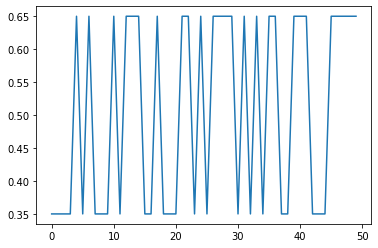

In [69]:
plt.plot(history.history['val_accuracy'])